# HW6 - Wordcloud
Nicholas Thomson

In [4]:
!pip install wordcloud

# Extract Words
Use beautiful soup to extract the important information from Wikipedia. p and h2 tags in the mw-content-text div

In [5]:
import os
from bs4 import BeautifulSoup

import re
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [6]:
webpagefolder = "pages"
text = [] #Array of strings. Each string is one web page's text

for filename in os.listdir(webpagefolder):
    filepath = os.path.join(webpagefolder, filename)
    with open(filepath, "r", encoding="utf-8", errors="ignore") as file:
        html = file.read()
        soup = BeautifulSoup(html, 'html.parser')

        paragraphs = soup.select('#mw-content-text p,h2')
    html_text = "" #Text content for this web page
    for paragraph in paragraphs:
        if '[edit]' in paragraph.get_text():
            continue
        html_text += paragraph.get_text() + "\n"
    html_text = re.sub(r'\s+', ' ', html_text)
    text.append(html_text)

In [7]:
#Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

#Compute TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform(text)

In [8]:
#Get all words
words = tfidf_vectorizer.get_feature_names_out()

#Create TF-IDF dataframe
df = pd.DataFrame(data = tfidf_matrix.toarray(), columns = words)

In [9]:
df.head()

,000,10,100,1000,101,102,103,104,105,106,...,yield,york,young,younger,youth,youtube,zealand,zero,zones,zuckerberg
0,0.005901,0.035092,0.000000,0.0,0.007214,0.029349,0.022204,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.009364,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.008878,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.011692,0.027810,0.012192,0.0,0.000000,0.000000,0.000000,0.000000,0.014860,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.013749,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.029789,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.009119,0.008676,0.011412,0.0,0.002229,0.002268,0.002287,0.002298,0.002318,0.002318,...,0.0,0.016449,0.011749,0.002894,0.006212,0.0,0.0,0.0,0.0,0.0


In [10]:
#df.sum().sort_values(ascending=False)[0:500]
#Create a dictionary that contains pairs of word:tf_idf score
tfidf_scores = {}
for word, tfidf_score in df.sum().items():
    if(word == 'used' or word == 'use'):
        continue
    tfidf_scores[word] = tfidf_score
print(tfidf_scores)

{'000': 3.0274744021157356, '10': 3.5023983739867863, '100': 1.4300502437965605, '1000': 0.34176547870762364, '101': 0.4026191764710361, '102': 0.41109501770495194, '103': 0.4275373373725137, '104': 0.3728888885463552, '105': 0.40094709490577507, '106': 0.3746879442474882, '107': 0.3746966625920697, '108': 0.3392038553560859, '109': 0.36290574209275883, '11': 2.948717832706141, '110': 0.3530744712117782, '111': 0.4632506107365258, '112': 0.3235931153849618, '113': 0.3126015978053595, '114': 0.29704033444703093, '115': 0.3605102801174406, '116': 0.3109628371303602, '117': 0.28748659632009343, '118': 0.3450832854942395, '119': 0.33720617993987906, '12': 2.7579327291630613, '120': 0.49522376279358943, '121': 0.34097479302959505, '122': 0.2999244840778116, '123': 0.33988642144293885, '124': 0.30917441037186383, '125': 0.39301154043807884, '126': 0.4013036200605448, '127': 0.2898050077976222, '128': 0.3344159095148249, '129': 0.31688328697934093, '12th': 0.21342019443099824, '13': 2.4819648

In [16]:
#Check which words have hisghest tf-idf score
sorted(tfidf_scores.items(), key=lambda item:item[1], reverse=True)

[('data', 42.6871572431674),
 ('information', 26.074380126387158),
 ('science', 16.85485691960213),
 ('social', 16.13962015050475),
 ('library', 13.738026773128636),
 ('knowledge', 11.872852539247823),
 ('used', 11.036517419130636),
 ('research', 10.145999179506411),
 ('studies', 9.993805323093072),
 ('computer', 9.912167959673459),
 ('systems', 9.469312875851223),
 ('history', 9.210080099816219),
 ('human', 9.184199370721469),
 ('law', 8.915655922419624),
 ('use', 8.834821876741776),
 ('new', 8.68210519565756),
 ('theory', 8.562716708417327),
 ('public', 8.133788460534989),
 ('political', 8.063384255881234),
 ('study', 7.843873351675343),
 ('society', 7.839912114616646),
 ('analysis', 7.700116724703216),
 ('libraries', 7.696524246058834),
 ('world', 7.648066754304374),
 ('technology', 7.633822499939213),
 ('example', 7.606358014016322),
 ('university', 7.404333456628246),
 ('design', 7.2934766546883045),
 ('software', 7.247782941998099),
 ('scientific', 7.1219687338753985),
 ('busines

# Create a word cloud

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color="white").fit_words(tfidf_scores)

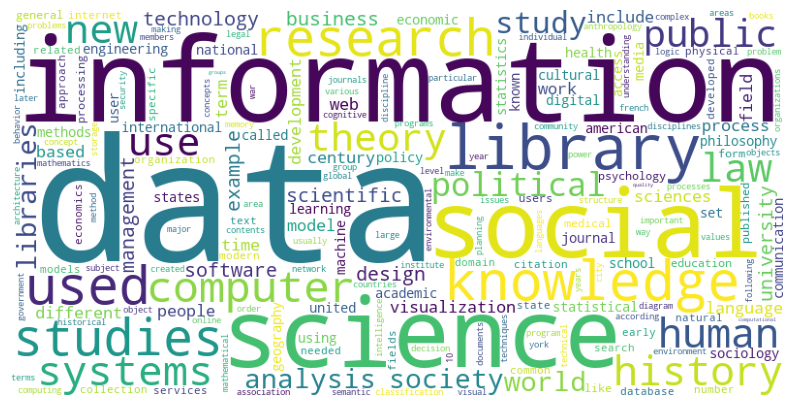

In [14]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()